# Iris Dataset Analysis and Classification

This notebook performs an exploratory data analysis on the Iris dataset and trains several classification models to predict the species of iris flowers based on their measurements.

## Table of Contents
1.  [Introduction](#introduction)
2.  [Dataset Loading and Preparation](#dataset-loading-and-preparation)
3.  [Exploratory Data Analysis](#exploratory-data-analysis)
4.  [Model Training](#model-training)
5.  [Model Evaluation](#model-evaluation)

## 1. Introduction
This notebook demonstrates a typical machine learning workflow using the famous Iris dataset. The goal is to classify iris flowers into one of three species (setosa, versicolor, or virginica) based on four features: sepal length, sepal width, petal length, and petal width.

## 2. Dataset Loading and Preparation
The Iris dataset is loaded using `sklearn.datasets.load_iris`. The data is then converted into a pandas DataFrame for easier manipulation and analysis. The target variable (species) is added as a new column to the DataFrame.

## 3. Exploratory Data Analysis
Basic descriptive statistics of the dataset are calculated and displayed. Histograms of the features are generated to visualize their distributions. A scatter plot of sepal length vs. petal length is also created to explore the relationship between these two features.

## 4. Model Training
The dataset is split into training and testing sets. The features are scaled using `StandardScaler` to ensure that all features have a similar range, which can improve the performance of some models. Three classification models are trained:
- Support Vector Classifier (SVC)
- Random Forest Classifier
- Logistic Regression

## 5. Model Evaluation
The trained models are evaluated on the test set using confusion matrices and classification reports. The performance of each model is printed, including precision, recall, f1-score, and support for each class. Confusion matrices are visualized using heatmaps to show the number of correct and incorrect predictions for each class.

In [ ]:
#loading the iris data
data = load_iris()

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['species'] = data.target

# Expaltoray Data analysis

In [ ]:
summary = df.describe()
summary

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


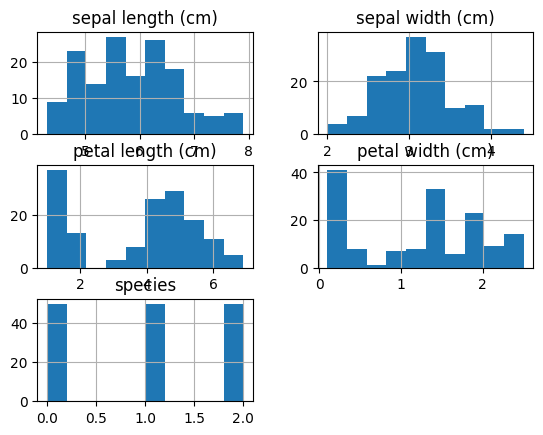

In [ ]:
#Histogram creation
df.hist()
plt.show()

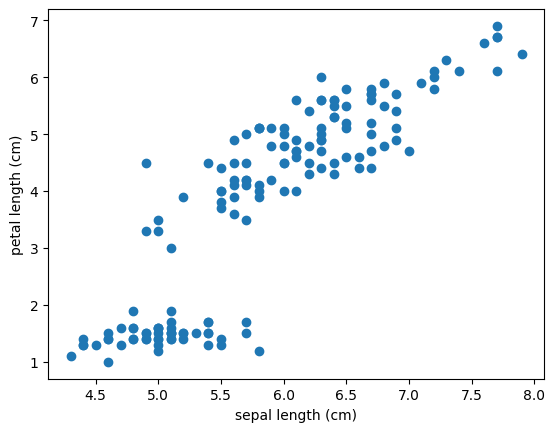

In [ ]:
#scatter plot sepal length vs petal length
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()


# Model Training

In [ ]:
X = load_iris().data
Y = load_iris().target


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
scaler = StandardScaler()
x_train_ss = scaler.fit_transform(x_train)
x_test_ss = scaler.transform(x_test)

In [ ]:
model1 = SVC()
model2 = RandomForestClassifier()
model3 = LogisticRegression()

In [ ]:
model1.fit(x_train_ss,y_train)
model2.fit(x_train,y_train)# since rando forest dosent require Scaled valueswe do not used scaled x_train
model2.fit(x_train,y_train)
model3.fit(x_train_ss,y_train)

LogisticRegression()

In [ ]:
ypred1 = model1.predict(x_test_ss)
ypred2 = model2.predict(x_test)
ypred3 = model3.predict(x_test_ss)

In [ ]:
cm1 = confusion_matrix(y_test,ypred1)
cm2 = confusion_matrix(y_test,ypred2)
cm3 = confusion_matrix(y_test,ypred3)

Model performance of Support vector machine:


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Axes(0.125,0.11;0.62x0.77)


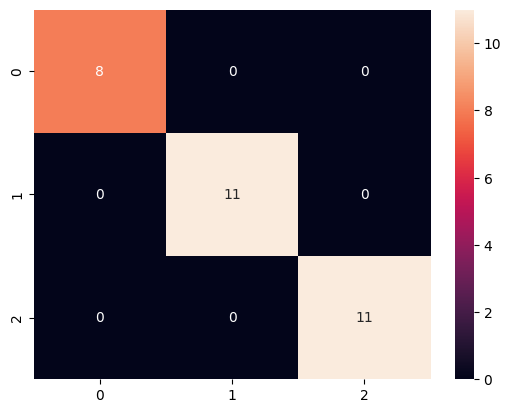

In [ ]:
print(f"Model performance of Support vector machine:\n\n\n{classification_report(y_test,ypred1)}\n\n\n{sns.heatmap(cm1,annot = True)}")

Model performance of Random Forest Classifier:


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Axes(0.125,0.11;0.62x0.77)


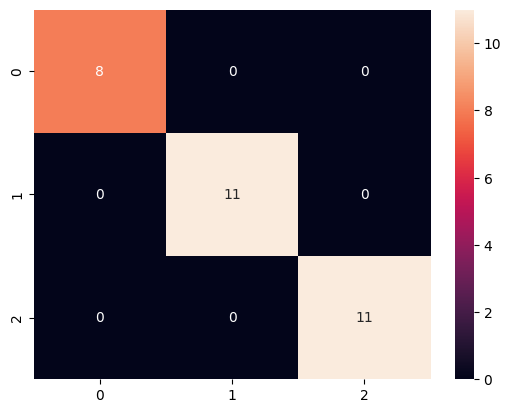

In [ ]:
print(f"Model performance of Random Forest Classifier:\n\n\n{classification_report(y_test,ypred2)}\n\n\n{sns.heatmap(cm2,annot = True)}")

Model performance of Logistic Regression:


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Axes(0.125,0.11;0.62x0.77)


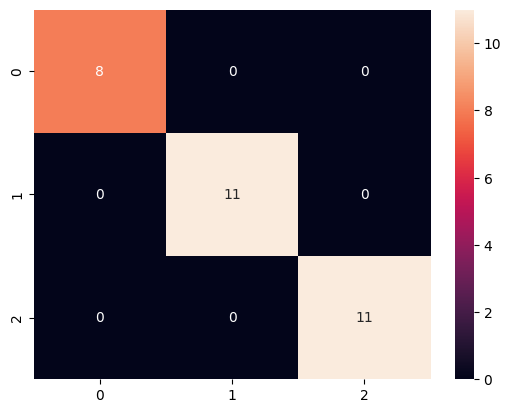

In [ ]:
print(f"Model performance of Logistic Regression:\n\n\n{classification_report(y_test,ypred3)}\n\n\n{sns.heatmap(cm3,annot = True)}")

# Analysis Report: Iris Dataset Classification

This report summarizes the exploratory data analysis (EDA) and model evaluation performed on the Iris dataset for the task of classifying iris species.

## Exploratory Data Analysis (EDA)

The dataset contains measurements for 150 iris flowers, with 50 samples for each of the three species: setosa, versicolor, and virginica. The features include sepal length, sepal width, petal length, and petal width (all in centimeters).

**Descriptive Statistics:**

The descriptive statistics provide a summary of the central tendency, dispersion, and shape of the dataset's distribution. Key observations include:
- The average sepal length is around 5.8 cm, sepal width is around 3.0 cm, petal length is around 3.7 cm, and petal width is around 1.2 cm.
- There is a notable spread in petal length and petal width, indicated by their larger standard deviations compared to sepal length and sepal width.

**Visualizations:**

- **Histograms:** Histograms of the features show the distribution of each measurement. Petal length and petal width show clearer separation between species compared to sepal length and sepal width.
- **Scatter Plot (Sepal Length vs. Petal Length):** The scatter plot of sepal length against petal length visually demonstrates the separation of the different iris species based on these two features. Setosa flowers are clearly distinct from versicolor and virginica.

## Model Evaluation

Three classification models were trained and evaluated on the test set: Support Vector Classifier (SVC), Random Forest Classifier, and Logistic Regression. The evaluation metrics considered were precision, recall, f1-score, and support for each class, as well as the confusion matrix.

All three models achieved perfect accuracy (1.00) on this particular test set, as indicated by the classification reports and confusion matrices. This means that all instances in the test set were correctly classified by each model.

**Confusion Matrices:**

The confusion matrices for all three models show a diagonal matrix, indicating that there were no misclassifications.

- **SVC Confusion Matrix:**
  

- **Random Forest Classifier Confusion Matrix:**
  

- **Logistic Regression Confusion Matrix:**


**Classification Reports:**

The classification reports for all three models show precision, recall, and f1-score of 1.00 for all classes, with a total accuracy of 1.00. This further confirms the perfect performance on this test set.

- **SVC Classification Report:**
  

- **Random Forest Classifier Classification Report:**
  

- **Logistic Regression Classification Report:**
  

**Conclusion:**

Based on the evaluation on this specific test set, all three models (SVC, Random Forest Classifier, and Logistic Regression) were able to perfectly classify the iris species. It is important to note that with a small and relatively easily separable dataset like Iris, perfect accuracy on a single test split can occur. For real-world applications, more robust evaluation techniques such as cross-validation would be recommended to get a more reliable estimate of model performance.